<a href="https://colab.research.google.com/github/Margo-s-M/-/blob/master/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%BD%D0%B0_%D0%B0%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів та даних

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sales = pd.read_csv(
    'https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/bike_sales.csv',
    index_col = "Unnamed: 0",
    parse_dates=['Date'])

In [3]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [6]:
sales.columns = sales.columns.str.lower()
sales

,date,day,month,year,customer_age,age_group,customer_gender,country,state,product_category,sub_category,product,order_quantity,unit_cost,unit_price,profit,cost,revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


# Завдання 1
Виведіть середнє значення та медіану для `order_quantity`. Чи є викиди?

In [7]:
sales['order_quantity'].mean()

11.901659648253654

In [8]:
median_cost = sales['order_quantity'].median()
median_cost

10.0

# Завдання 2
Намалюйте гістограму та ящик з вусами для `order_quantity`

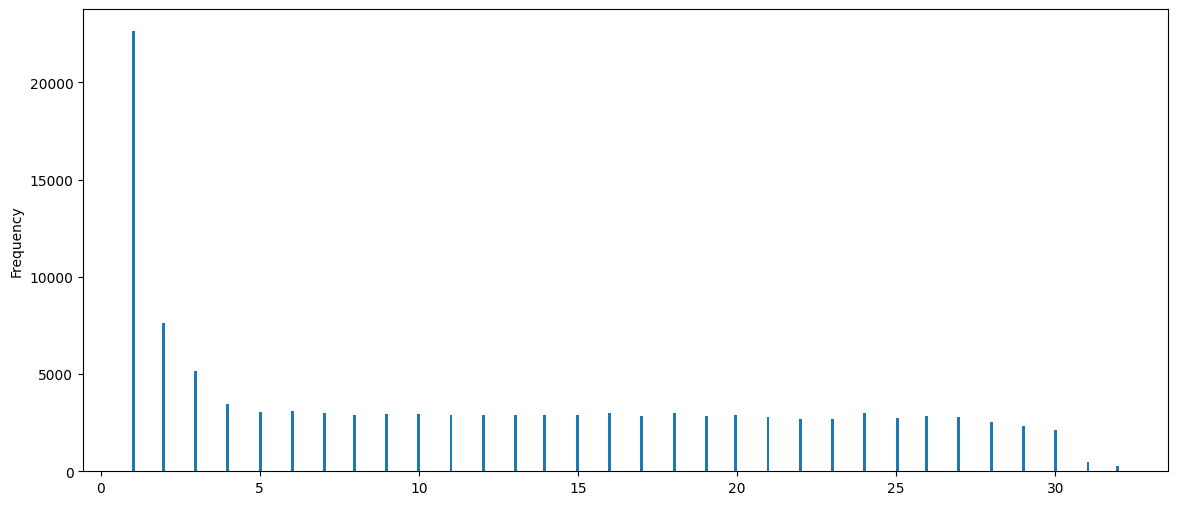

In [17]:
ax = sales['order_quantity'].plot(kind='hist',
                                bins=int(np.sqrt(rows)),
                                figsize=(14,6)
                               )

In [14]:
rows =sales.shape[0]

<Axes: >

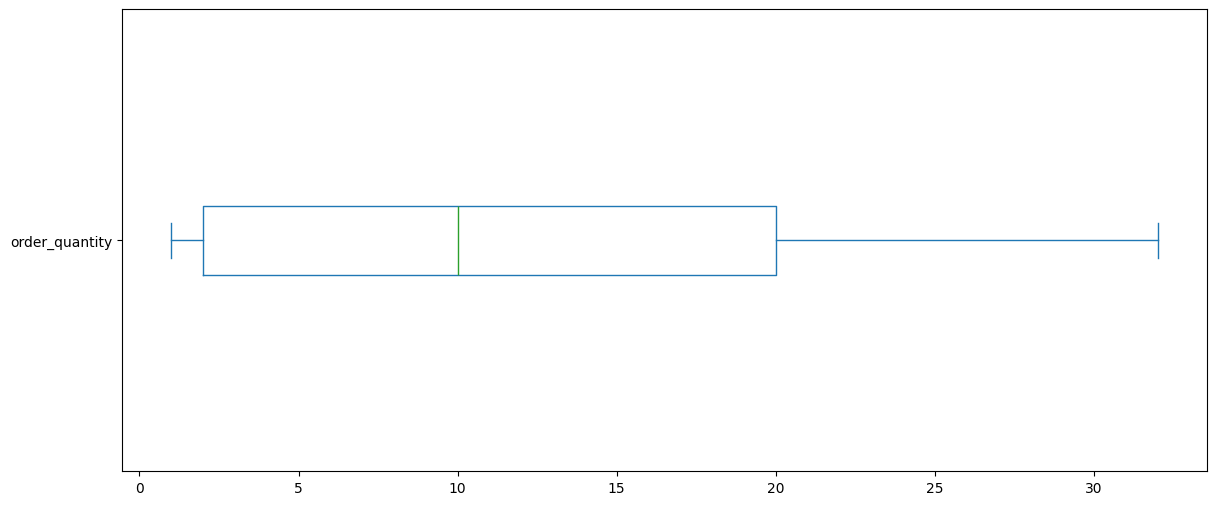

In [10]:
sales['order_quantity'].plot(kind='box', vert=False, figsize=(14,6))

# Завдання 3
Очистіть дані від викидів. Алгоритм:

1. Обчислюємо нижній `q1` та верхній `q3` квантилі
2. Очислюємо значення `IQR = q3 - q1`
3. Обчислюємо `lower = q1 - 1.5*IQR`
4. Обчислюємо `upper = q3 + 1.5*IQR`
5. Викидами вважаємо значення які `< lower` або `>upper`

In [ ]:
def remove_outliers(df, column_name):
  column = df[column_name]

  q1 = column.quantile(q=0.25)
  q3 = column.quantile(q=0.75)

  iqr = q3 - q1

  lower = q1 - 1.5*iqr
  upper = q3 + 1.5*iqr

  mask = (column >= lower) & (column <= upper)

  return df[mask]


# Завдання 4
Ввиведіть гістограму з кількістю чоловіків та жінок серед покупців.

# Завдання 5
Виведіть точкову діаграму для ознак `order_quantity` та `revenue`

# Завдання 6
Знайдіть категоріальну характеристику, від якої залежить ознака `profit`